In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

In [14]:
mcdonalds = pd.read_csv("mcdonalds.csv" ) # Data Loading

In [15]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [16]:
mcdonalds.shape # Checking dimensionality

(1453, 15)

In [17]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [18]:
df = mcdonalds.iloc[:,0:11] # Features extraction

In [19]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [20]:
df.yummy.value_counts(normalize=True)

Yes    0.55265
No     0.44735
Name: yummy, dtype: float64

In [21]:
df1 = pd.DataFrame()

In [22]:
for i in df.columns:
    df1[i] = df[i].replace({'Yes': 1, 'No':0})  # Data Encoding , replacing the values with 1 and 0

In [23]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [24]:
for i in df1.columns:
    print(i,': ',round(len(df1[df1[i]==1])/ len(df1),2))  

yummy :  0.55
convenient :  0.91
spicy :  0.09
fattening :  0.87
greasy :  0.53
fast :  0.9
cheap :  0.6
tasty :  0.64
expensive :  0.36
healthy :  0.2
disgusting :  0.24


In [26]:
pca = PCA(random_state=1)

In [27]:
components = pca.fit_transform(df1)

In [28]:
components.shape

(1453, 11)

In [29]:
df_pca = pd.DataFrame(components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])

In [30]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [31]:
df_pca.describe() # Five point summary analysis

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,2.307552e-17,-4.137548e-17,-2.110918e-17,4.322840e-17,4.515773e-17,-3.961808e-17,4.406890e-17,-5.539654e-17,-2.976131e-17,5.616063e-17,1.134674e-17
std,7.570495e-01,6.074556e-01,5.046195e-01,3.987986e-01,3.374050e-01,3.102746e-01,2.896973e-01,2.751220e-01,2.652511e-01,2.488418e-01,2.369028e-01
min,-1.188421e+00,-1.040274e+00,-8.808133e-01,-5.906209e-01,-1.045938e+00,-8.524911e-01,-8.059463e-01,-9.316201e-01,-9.557606e-01,-8.871971e-01,-8.851439e-01
25%,-5.476794e-01,-3.568482e-01,-4.507793e-01,-2.814986e-01,-2.433247e-01,-1.927027e-01,-1.342190e-01,-1.717258e-01,-1.181233e-01,-1.465751e-01,-1.053163e-01
50%,-7.074592e-02,-1.151632e-01,2.687734e-02,-1.163200e-01,3.348785e-02,-3.460184e-02,-6.366220e-02,-3.475619e-02,3.868061e-02,3.020635e-02,-1.201409e-02
75%,4.933012e-01,3.915540e-01,3.515939e-01,2.702298e-01,2.048293e-01,1.747453e-01,2.318357e-02,1.295966e-01,7.987794e-02,7.001416e-02,8.554080e-02
max,1.705573e+00,1.279130e+00,1.326976e+00,1.355278e+00,1.053327e+00,1.323793e+00,1.350886e+00,1.121388e+00,1.086693e+00,1.181524e+00,9.255829e-01


In [32]:
pca.feature_names_in_

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype=object)

In [33]:
pca.explained_variance_

array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

In [34]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

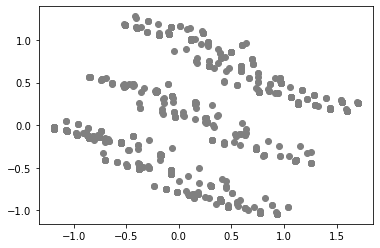

In [35]:
plt.scatter(df_pca.PC1, df_pca.PC2, c= 'grey')

In [36]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


<AxesSubplot:>

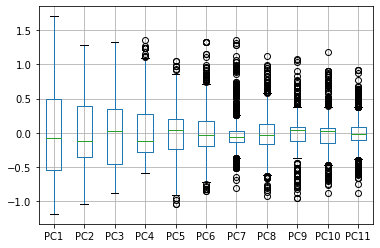

In [37]:
df_pca.boxplot()

In [38]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


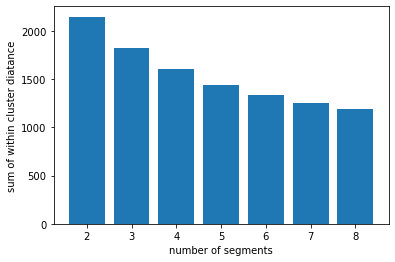

In [39]:
X= np.array(df1)
nrep = 10
wc =[]
for i in range(2,9):
    models = KMeans(n_clusters = i , n_init = nrep, random_state = 1234)
    cluster_labels = models.fit(X)
    wc.append((cluster_labels.inertia_))
plt.bar(range(2,9), wc)
plt.xlabel("number of segments")
plt.ylabel("sum of within cluster diatance")
plt.show()

In [40]:
md = mcdonalds.iloc[:,11:]

In [41]:
df_new = pd.concat([df1, md], axis =1)

In [42]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [43]:
df_new = pd.concat([df_new, pd.DataFrame({'cluster_label':cluster_labels.labels_})], axis = 1)

In [44]:
df_new.Like.value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [45]:
le = LabelEncoder()                                    # Using label encoder to encode the categorical values.
df_new ['Like']  = le.fit_transform(df_new ['Like'])

In [46]:
df_new['VisitFrequency'] = le.fit_transform(df_new['VisitFrequency'])
df_new['Gender'] = le.fit_transform(df_new['Gender'])

In [47]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_label
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0,4
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,5
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,4


In [48]:
ss = StandardScaler()                                             # Scaling for the numerical feature age
df_new['Age'] = ss.fit_transform(df_new['Age'].values.reshape(-1,1))

In [49]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_label
0,0,1,0,1,0,1,1,0,1,0,0,6,1.153258,0,0,4
1,1,1,0,1,1,1,1,1,1,0,0,1,0.449839,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,0,1.223600,0,0,5
3,1,1,0,1,1,1,1,1,0,0,1,3,1.715993,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,1,0.309156,3,1,4


In [50]:
X = df_new.drop('cluster_label', axis = 1)                 # Separating independent and dependent features.

In [51]:
y = df_new.cluster_label

In [52]:
X.shape

(1453, 15)

In [53]:
y.shape

(1453,)

In [54]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1234)
# Splitting the data into train and test set.

In [55]:
print("Xtrain: ", Xtrain.shape)
print("ytrain: ", ytrain.shape)
print("Xtest: ", Xtest.shape)
print("ytest: ", ytest.shape)

Xtrain:  (1162, 15)
ytrain:  (1162,)
Xtest:  (291, 15)
ytest:  (291,)


In [73]:
dc = DecisionTreeClassifier(criterion="entropy",random_state=1234, max_depth=10) # Using decision tree algorithm on train set.
dc_model = dc.fit(Xtrain, ytrain)

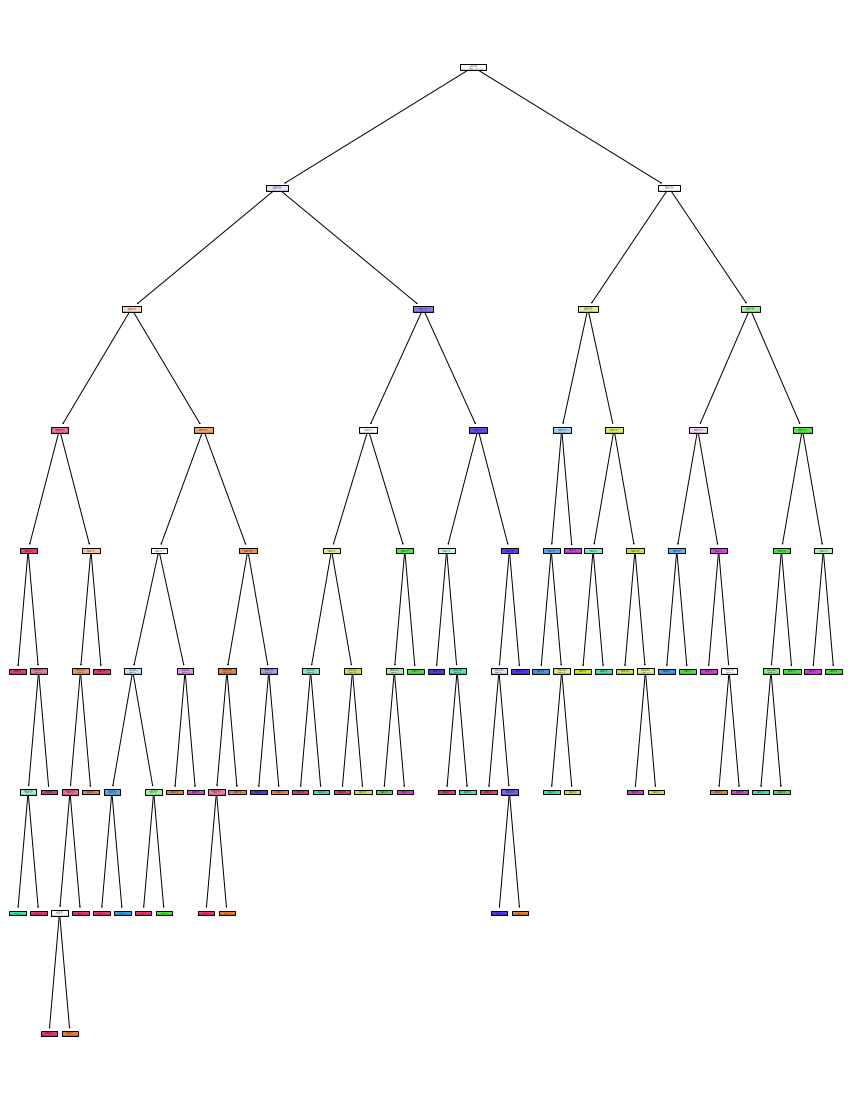

In [74]:
figure = plt.figure(figsize=(15,20))
_ = tree.plot_tree(dc_model, feature_names=Xtrain.columns, filled = True)

In [75]:
ypred = dc_model.predict(Xtest)

In [76]:
accuracy_score(ytest, ypred)           # Checking for test accuracy.

0.9759450171821306